# Clean/Transform the Calendar Dataset
***The Goal of this file will be to use the Calendar Dataset and extract information regarding how many days each place was rented.  This information will then be joined with the Listings dataframe*** 
- Group the dataset by Listings; figure out the total number of days rented for each listing
- Based on that answer, calculate the vacancy rate
- Merge with the listings dataset and study places with high vacancy rates


In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Berlin_airbnb/listings_clean.csv')
calendar = pd.read_csv('Berlin_airbnb/calendar_summary.csv')

In [3]:
calendar.sample(10)

,listing_id,date,available,price
6601564,23761166,2019-08-11,f,NaN
1388138,5983873,2019-08-15,f,NaN
5486734,20859002,2019-08-05,f,NaN
628466,2397684,2019-02-06,f,NaN
4201959,17259371,2019-04-15,f,NaN
1576205,6697033,2019-04-18,t,$79.00
3116933,12919725,2019-04-09,f,NaN
5274390,20449134,2018-11-14,f,NaN
6513742,23600491,2019-02-14,f,NaN
6722755,24303386,2019-08-29,t,$48.00


In [4]:
#No Null Values!!
calendar.isna().sum()

listing_id          0
date                0
available           0
price         6430639
dtype: int64

In [5]:
calendar['days_rented'] = calendar['available'].replace({'t':0, 'f':1})

In [6]:
vacancy = calendar.groupby('listing_id')['days_rented'].sum().reset_index()

In [7]:
vacancy['vacancy'] = (365 - vacancy['days_rented'])/365

In [23]:
#With an average occupancy rate of 61.6 percent, Berlin has the 7th highest Airbnb demand in the world, 
#the most of any other European city besides Lisbon.
vacancy['vacancy'].mean()

0.21877487402022483

<AxesSubplot:>

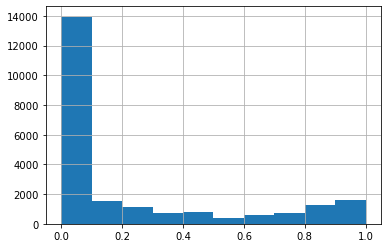

In [9]:
vacancy['vacancy'].hist()

### Observations
- This looks better than I thought.  For the most part, most homes in Berlin are rented out a good portion of the year.  There are about 3000-4000 homes that have high vacancy rates.  I will most likely delete these values as they may represent people who are not actively seeking out renters

In [10]:
df1 = df.merge(vacancy, left_on='id', right_on='listing_id')

In [12]:
df1.groupby('neighbourhood_group_cleansed')['vacancy'].mean()

neighbourhood_group_cleansed
Charlottenburg-Wilm.        0.324195
Friedrichshain-Kreuzberg    0.182188
Lichtenberg                 0.203094
Marzahn - Hellersdorf       0.489595
Mitte                       0.233236
Neukölln                    0.142620
Pankow                      0.221943
Reinickendorf               0.323110
Spandau                     0.535793
Steglitz - Zehlendorf       0.343720
Tempelhof - Schöneberg      0.255058
Treptow - Köpenick          0.248836
Name: vacancy, dtype: float64

### Observations
- For the most part, the vacancy rate is staying below 35% which is right where the average for Berlin is.  
- For the areas with higher vacancy rates investigate more: 
    * Marzahn - Hellersdorf: Originally part of east berlin.  Does not seem like a attractive place to live. Also a place with high Neo-Nazi Activity. 
    * Spandau : Just looks like a sleepy suburb that tourists wouldn't try to visit. 

In [13]:
df1.to_pickle('List_Cal_df.pkl')